#ANÁLISIS EXPLORATORIO DE DATOS - EDA
"Conjunto de técnicas estadísticas cuyo objetivo es explorar, describir y resumir la naturaleza de los datos y comprender las relaciones existentes entre las variables de interés, maximizando la comprensión del conjunto de datos".

El EDA, de acuoerdo a Wickman y Çetinkaya-Rundel y Grolemund (2023) propone seguir los siguientes pasos:
1. **Realizar un análisis descriptivo de las variables**, con el fin de obtener una idea representativa de los datos.
2. **Re-ajustar tipos de variables** para que sean consistentes en el momento de realizar posteriores operaciones.
3. **Detectar y tratar datos ausentes**, que nos permitirá procesar adecuadamente las variables numéricas.
4. **Identificar datos atípicos y tratarlos de forma adecuada**. Esto mitigará la distorsión de futuros análisis estadísticos.
5. **Realizar un examen numérico y gráfico de las relaciones entre variables analizadas para determinar el grado de correlación entre ellas**

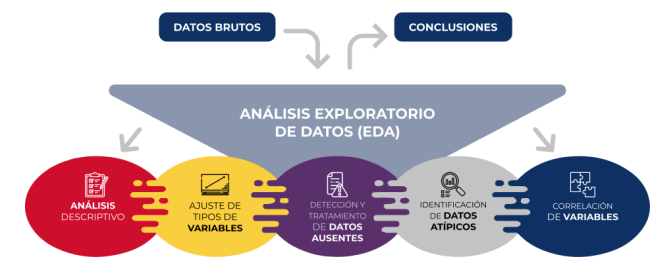

##TALLER
Para ello, realizaremos un ejercicio en el cuál se analizará estudiaremos el dataset de titanic con el fin de poder responder a la siguiente pregunta: Podría Jack sobrevivir al hundimiento del TITANIC (de acuerdo a lo arrojado por los datos).

Para ello, descargue el dataset de titanic y realice un análisis descriptivo de todos los datos posibles del dataset (emplee los conceptos ya aprendidos en el primer corte.

###ANÁLISIS DESCRIPTIVO

In [1]:
#Realice aquí su análisis descriptivo y emita sus conclusiones. Emplee todas las gráficas necesarias para poder emitir conclusiones con respecto a la tripulación del titanic.
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
df=pd.read_csv("https://raw.githubusercontent.com/nt246/NTRES-6100-data-science/master/datasets/Titanic.csv")

Cómo podemos llenar los datos nulos?

Los datos disponibles son suficientes para generar un modelo mínimo viable?

### AJUSTES DE VARIABLES
Observemos el dataset de TITANIC:
* La presentación de todas las variables es la adecuada? Si su respuesta es si, qué tipo de variable posee la feature Age?
AGE es una variable de tipo float. Queremos que sea de tipo entero. Genere un nuevo dataset con la característica AGE de tipo entero. Así mismo, revise que las características Survived y Pclass sean numéricas.

### DETECCIÓN Y TRATAMIENTO DE DATOS AUSENTES
Como se pudo observar, el dataset de titanic posee una cantidad de (llenar aquí con la información) datos nulos, los cuáles deben ser tratados para un posterior entendimiento de los datos. Ejecute las siguientes líneas de código para arreglar el dataset y explica los resultados obtenidos.

In [2]:
df.isnull()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,False,False,False,False,False,False,False,False,False,False,True,False
1,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,True,False
3,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...
886,False,False,False,False,False,False,False,False,False,False,True,False
887,False,False,False,False,False,False,False,False,False,False,False,False
888,False,False,False,False,False,True,False,False,False,False,True,False
889,False,False,False,False,False,False,False,False,False,False,False,False


In [3]:
df.isnull().sum()

,0
PassengerId,0
Survived,0
Pclass,0
Name,0
Sex,0
Age,177
SibSp,0
Parch,0
Ticket,0
Fare,0


In [4]:
total=df.isnull().sum().sort_values(ascending=False)
total

,0
Cabin,687
Age,177
Embarked,2
PassengerId,0
Name,0
Pclass,0
Survived,0
Sex,0
Parch,0
SibSp,0


In [5]:
df.isnull().count()

,0
PassengerId,891
Survived,891
Pclass,891
Name,891
Sex,891
Age,891
SibSp,891
Parch,891
Ticket,891
Fare,891


In [6]:
porcentajes=(df.isnull().sum()/df.isnull().count()).sort_values(ascending=False)
porcentajes

,0
Cabin,0.771044
Age,0.198653
Embarked,0.002245
PassengerId,0.000000
Name,0.000000
Pclass,0.000000
Survived,0.000000
Sex,0.000000
Parch,0.000000
SibSp,0.000000


In [7]:
datos_perdidos=pd.concat([total,porcentajes],axis=1,keys=['Total','Porcentaje'])
datos_perdidos

,Total,Porcentaje
Cabin,687,0.771044
Age,177,0.198653
Embarked,2,0.002245
PassengerId,0,0.000000
Name,0,0.000000
Pclass,0,0.000000
Survived,0,0.000000
Sex,0,0.000000
Parch,0,0.000000
SibSp,0,0.000000


In [8]:
def plot_learning_curve(estimator,title,X,y,xlim=None,cv=None,n_jobs=1,train_sizes=np.linspace(.1, 1.0, 5)):
    plt.figure()
    plt.title(title)
    if ylim is not None:
        plt.ylim(*ylim)
    plt.xlabel("Ejemplos de entrenamiento")
    plt.ylabel("Puntuación de validación")
    train_sizes, train_scores, test_scores = learning_curve(
        estimator, X, y, cv=cv, n_jobs=n_jobs, train_sizes=train_sizes)
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)
    plt.grid()

    plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
                     train_scores_mean + train_scores_std, alpha=0.1,
                     color="r")
    plt.fill_between(train_sizes, test_scores_mean - test_scores_std,
                     test_scores_mean + test_scores_std, alpha=0.1, color="g")
    plt.plot(train_sizes, train_scores_mean, 'o-', color="r",
             label="Puntuación de entrenamiento")
    plt.plot(train_sizes, test_scores_mean, 'o-', color="g",
             label="Puntuación de validación")

    plt.legend(loc="best")
    return plt


Explique línea por línea qué está haciendo la función plot_learning_curve (responda preguntas como, qué tipo de datos solicita, qué otros valores se pueden usar, cuál es su uso, etc.). También explique la gráfica obtenida.

El resultado de esta actividad debe subirse a GITHUB el día 7 de abril/2025 a las 5:00pm.
**Actividades subidas en la franja de 5:01pm a 11:59pm será evaluado sobre 4.0.**

**Actividades subidas después del 7 de abril pero antes de la siguiente clase serán evaluadas sobre 3.0.**


##Para investigar:
Formule una estrategia que permita llenar los datos nulos del dataset y empléelo. Ejemplo: cómo podría llenar los datos nulos de edades?

##Mi solución

In [9]:
import pandas as pd

In [10]:
from IPython.display import Image
Image(url= "https://static1.squarespace.com/static/5006453fe4b09ef2252ba068/5095eabce4b06cb305058603/5095eabce4b02d37bef4c24c/1352002236895/100_anniversary_titanic_sinking_by_esai8mellows-d4xbme8.jpg")

In [11]:
notas=pd.read_csv("https://raw.githubusercontent.com/nt246/NTRES-6100-data-science/master/datasets/Notes.csv")
notas

,Variable,Definition,Key
0,PassengerId,Passenger ID,NaN
1,Survival,Survival,"0 = No, 1 = Yes"
2,Pclass,Ticket class,"1 = 1st, 2 = 2nd, 3 = 3rd"
3,Name,Pasenger name,NaN
4,Sex,Sex,NaN
5,Age,Age in years,NaN
6,Sibsp,# of siblings / spouses aboard the Titanic,NaN
7,Parch,# of parents / children aboard the Titanic,NaN
8,Ticket,Ticket number,NaN
9,Fare,Passenger fare,NaN


Diccionario de datos:
* Survived:0=No, 1=Sí
* sibsp= # de hermanos / esposos que embarcaron el Titanic
* parch: # de padres / niños que abordaron el Titanic
* ticket: Número del tiquete
* embarked: Puerto de embarcación C = Cherbourg, Q = Queenstown, S = Southampton

In [12]:
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set() # setting seaborn default for plots

##1. Analizando la relación entre las features con la probabilidad de supervivencia / mortalidad del TITANIC

In [13]:
def bar_chart(feature):
    survived = df[df['Survived']==1][feature].value_counts()
    dead =  df[df['Survived']==0][feature].value_counts()
    test = pd.DataFrame([survived,dead])
    test.index = ['Sobrevivientes','Fallecidos']
    test.plot(kind='bar',stacked=True, figsize=(10,5))

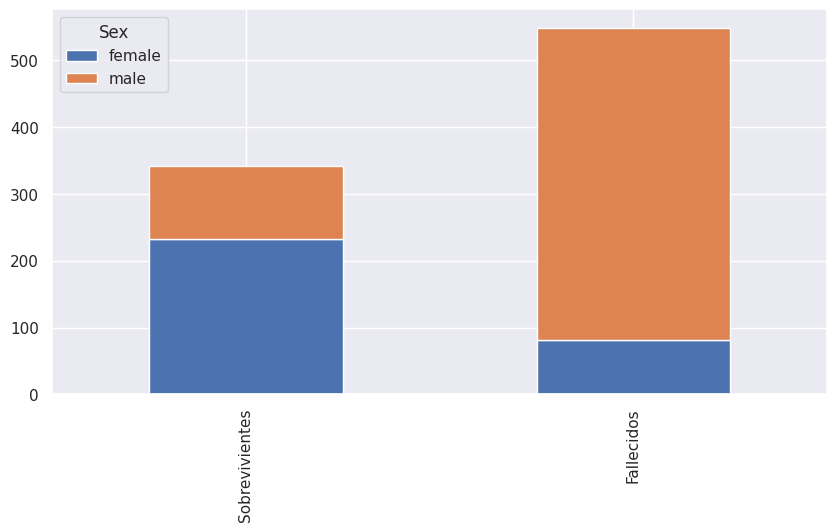

In [14]:
bar_chart('Sex')

La gráfica señala que las **mujeres** sobrevivieron más que los **hombres**

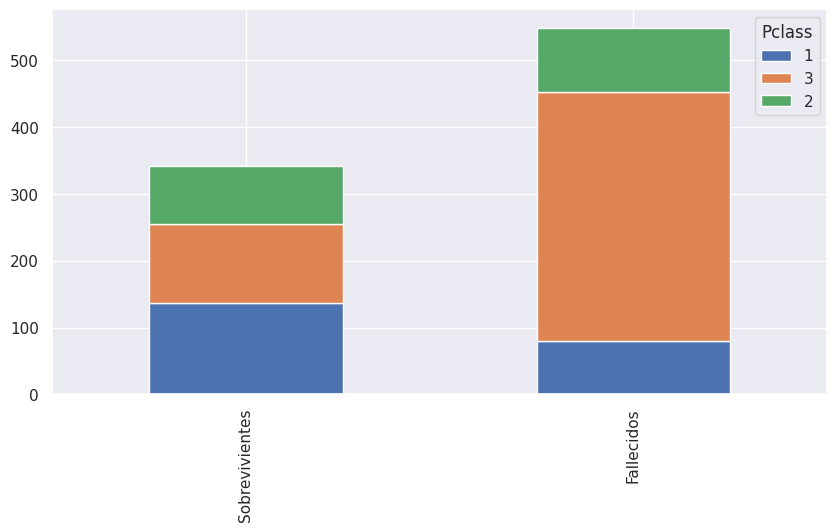

In [15]:
bar_chart('Pclass')

La gráfica señala que la **clase 1** sobrevieron más que las **otras clases**

La gráfica señala que la **clase 3** fallecieron más que las **otras clases**

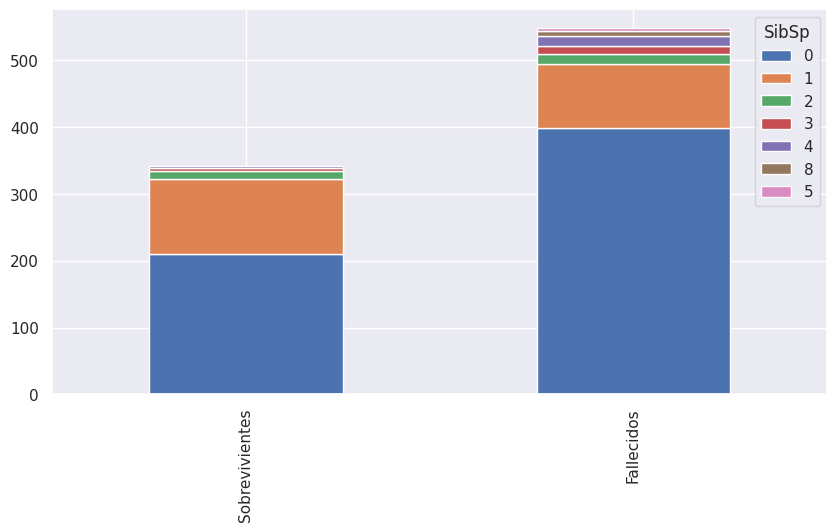

In [16]:
bar_chart('SibSp')

La gráfica señala que **una persona casada o con hermanos** tuvo más probabilidad de supervivencia que una persona **soltera**.

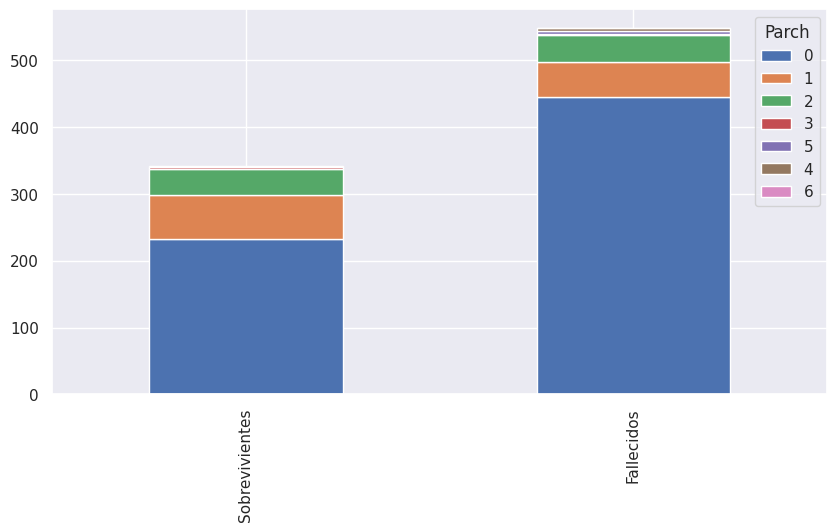

In [17]:
bar_chart('Parch')

La gráfica muestra que **una persona con dos o más hijos** tuvo más probabilidad de supervivencia que una persona **que abordó sola**.

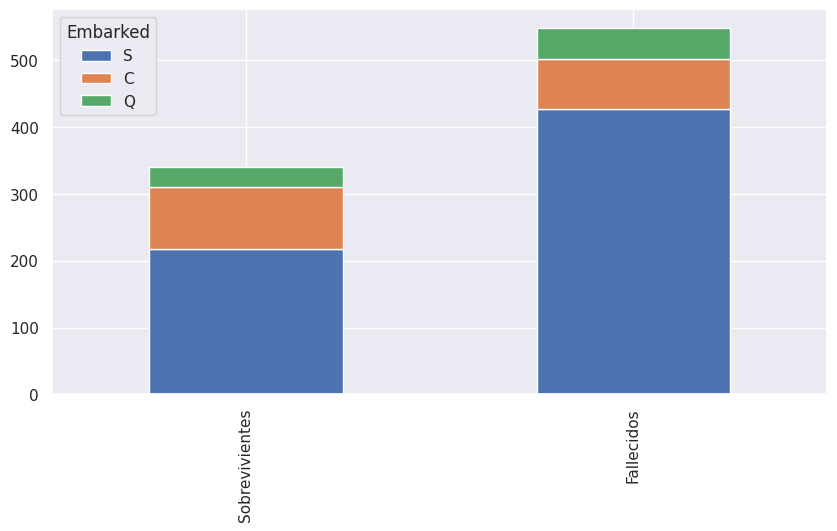

In [18]:
bar_chart('Embarked')

La gráfica confirma que:
* **Una persona que abordó desde C** tuvo una ligera probabilidad de sobrevivir.
* **Una persona que abordó desde Q o S** probablemente murió.

#Ingenieria de características
Es el proceso de usar el dominio de conocimiento de los datos para crear nuevas características (feature vectors) que logre que los algoritmos de machine learning funcionen correctamente.

Feature vector es un vector n-dimensional que representa un objeto. Muchos algoritmos en machine learning requieren una representación numérica de los objetos, ya que tales representaciones facilitan el procesamiento y el análisis estadístico.

## Cómo se hundió el titanic?
De acuerdo a lo conocido, por la proa del barco donde estaban las habitaciones de tercera clase

Conclusión, Pclass es la característica clave para el clasificador

In [19]:
Image(url= "https://static1.squarespace.com/static/5006453fe4b09ef2252ba068/t/5090b249e4b047ba54dfd258/1351660113175/TItanic-Survival-Infographic.jpg?format=1500w")

In [20]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


##2. Creando nuevos vector features

In [21]:
def extract_title(data):
    titles=data["Name"].str.extract('([A-Za-z]+)\.',expand=True)
    return titles

In [22]:
df["Title"]=extract_title(df)

In [23]:
df["Title"].value_counts()

,count
Title,
Mr,517
Miss,182
Mrs,125
Master,40
Dr,7
Rev,6
Col,2
Mlle,2
Major,2


##2.1 Creando un mapeo de los títulos
Para ello, reemplazaremos los títulos encontrados por los siguientes valores:
* Mr: 0
* Miss: 1
* Mrs = 2
* Otros = 3

In [24]:
def replace_titles(data):
  title_mapping = {"Mr": "Señor", "Miss": 'Señorita', "Mrs": "Señora"}
  data['Title'] = data['Title'].map(title_mapping).fillna("Otros")
  return data

In [25]:
df=replace_titles(df)
df[['Name', 'Title']].head()

,Name,Title
0,"Braund, Mr. Owen Harris",Señor
1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",Señora
2,"Heikkinen, Miss. Laina",Señorita
3,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",Señora
4,"Allen, Mr. William Henry",Señor


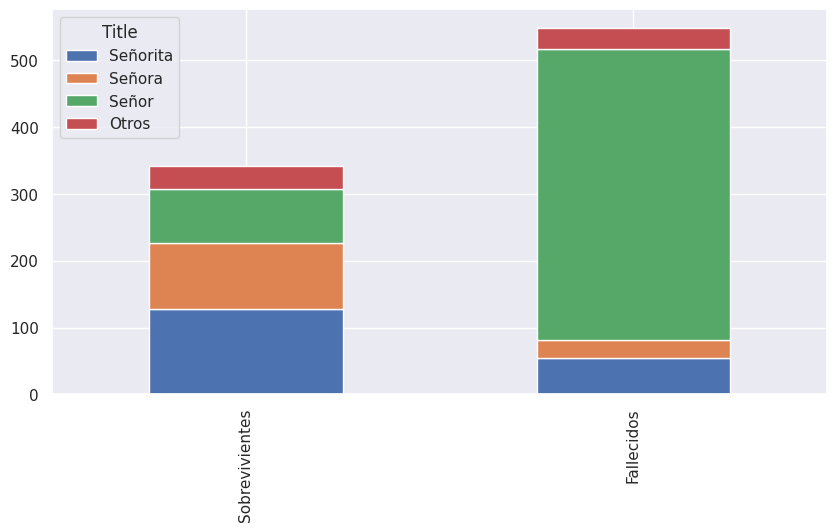

In [26]:
bar_chart("Title")

In [27]:
#Eliminando información innecesaria del dataset
df.drop(['Name', 'Ticket', 'Cabin'], axis=1, inplace=True)

In [28]:
df.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Title
0,1,0,3,male,22.0,1,0,7.2500,S,Señor
1,2,1,1,female,38.0,1,0,71.2833,C,Señora
2,3,1,3,female,26.0,0,0,7.9250,S,Señorita
3,4,1,1,female,35.0,1,0,53.1000,S,Señora
4,5,0,3,male,35.0,0,0,8.0500,S,Señor


##2.3 Analizando el sexo

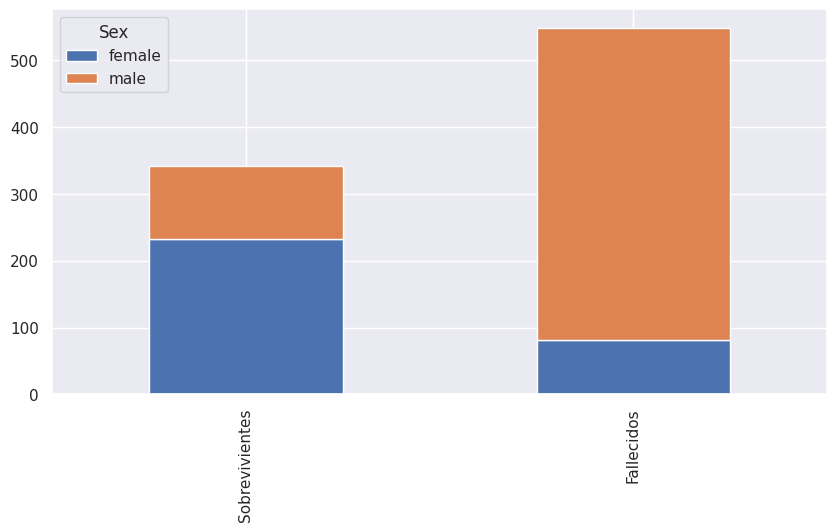

In [29]:
bar_chart("Sex")

##2.4 EDAD
###2.4.1 Arreglando las edades faltantes
Vamos a emplear la media de los títlulos para llenar las edades faltantes.

In [30]:
title_age_means = df.groupby('Title')['Age'].mean()
title_age_means

,Age
Title,
Otros,20.430161
Señor,32.368090
Señora,35.898148
Señorita,21.773973


In [31]:
df['Age'] = df.apply(lambda row: title_age_means[row['Title']] if pd.isnull(row['Age']) else row['Age'], axis=1)

In [32]:
df[['Title', 'Age']].head(30)

,Title,Age
0,Señor,22.000000
1,Señora,38.000000
2,Señorita,26.000000
3,Señora,35.000000
4,Señor,35.000000
5,Señor,32.368090
6,Señor,54.000000
7,Otros,2.000000
8,Señora,27.000000
9,Señora,14.000000


In [33]:
#df["Age"].fillna(df.groupby("Title")["Age"].transform("median"), inplace=True)

In [34]:
#df.sample(30)
#df.groupby("Title")["Age"].transform("median")

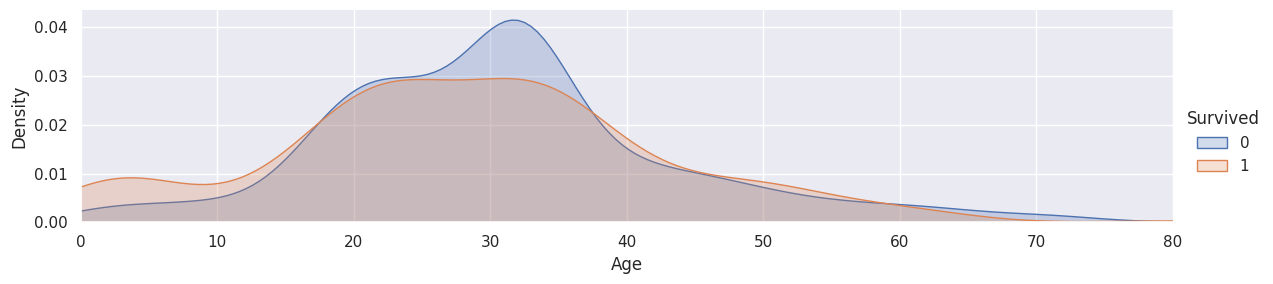

In [35]:
facet = sns.FacetGrid(df, hue="Survived",aspect=4)
facet.map(sns.kdeplot,'Age',fill= True)
facet.set(xlim=(0, df['Age'].max()))
facet.add_legend()

plt.show()

(0.0, 20.0)

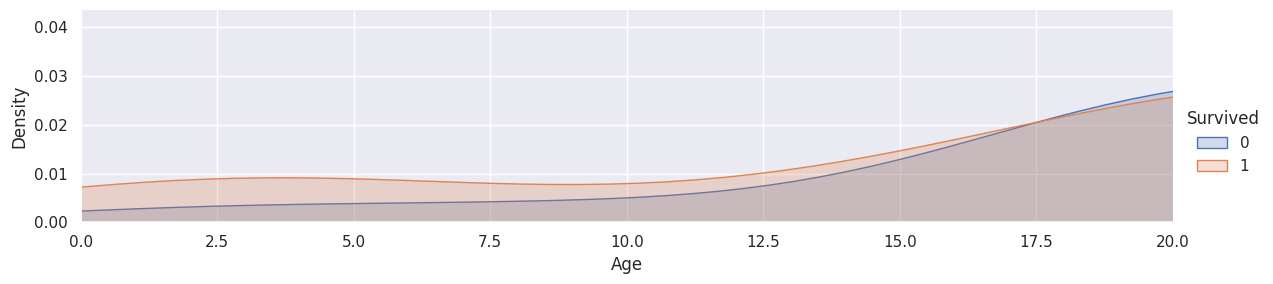

In [36]:
facet = sns.FacetGrid(df, hue="Survived",aspect=4)
facet.map(sns.kdeplot,'Age',fill= True)
facet.set(xlim=(0, df['Age'].max()))
facet.add_legend()
plt.xlim(0, 20)

(20.0, 30.0)

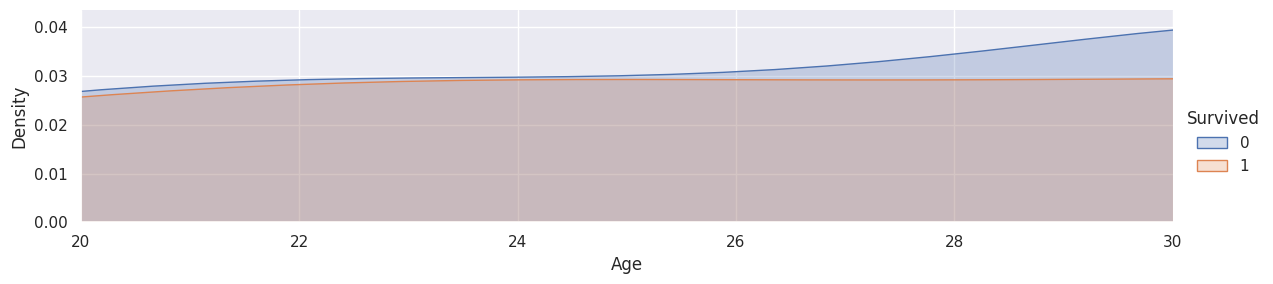

In [37]:
facet = sns.FacetGrid(df, hue="Survived",aspect=4)
facet.map(sns.kdeplot,'Age',fill= True)
facet.set(xlim=(0, df['Age'].max()))
facet.add_legend()
plt.xlim(20, 30)

(30.0, 40.0)

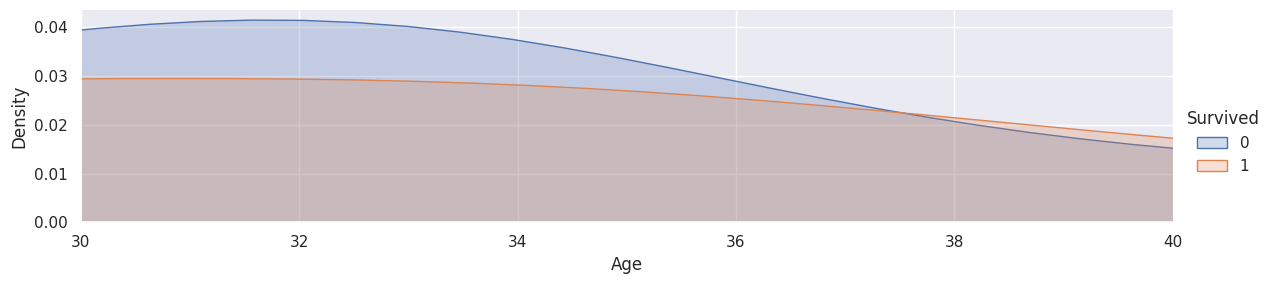

In [38]:
facet = sns.FacetGrid(df, hue="Survived",aspect=4)
facet.map(sns.kdeplot,'Age',fill= True)
facet.set(xlim=(0, df['Age'].max()))
facet.add_legend()
plt.xlim(30, 40)

(40.0, 60.0)

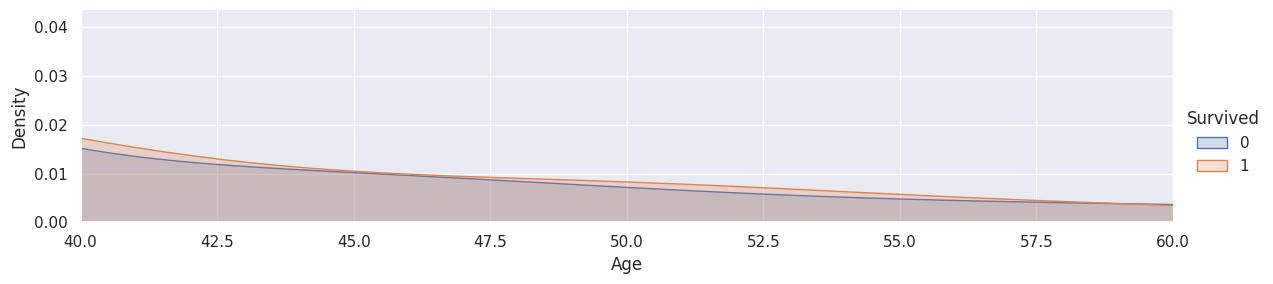

In [39]:
facet = sns.FacetGrid(df, hue="Survived",aspect=4)
facet.map(sns.kdeplot,'Age',fill= True)
facet.set(xlim=(0, df['Age'].max()))
facet.add_legend()
plt.xlim(40, 60)

(60.0, 80.0)

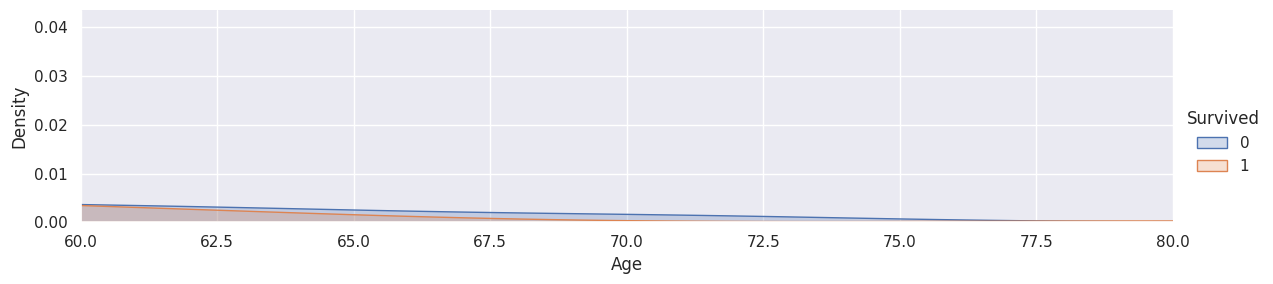

In [40]:
facet = sns.FacetGrid(df, hue="Survived",aspect=4)
facet.map(sns.kdeplot,'Age',fill= True)
facet.set(xlim=(0, df['Age'].max()))
facet.add_legend()
plt.xlim(60)

In [41]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Sex          891 non-null    object 
 4   Age          891 non-null    float64
 5   SibSp        891 non-null    int64  
 6   Parch        891 non-null    int64  
 7   Fare         891 non-null    float64
 8   Embarked     889 non-null    object 
 9   Title        891 non-null    object 
dtypes: float64(2), int64(5), object(3)
memory usage: 69.7+ KB


###2.4.2 Binning
Es convertir una variable numérica a categórica, en este caso, la edad.

Mapeo del feature vector:
* niño: 0
* joven: 1
+ adulto: 2
* edad madura: 3
* edad avanzada : 4

In [42]:
df['Age_Category'] = pd.cut(df['Age'], bins=[0, 16, 26, 36, 62, float('inf')], labels=[0, 1, 2, 3, 4], right=False)

In [43]:
df.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Title,Age_Category
0,1,0,3,male,22.0,1,0,7.2500,S,Señor,1
1,2,1,1,female,38.0,1,0,71.2833,C,Señora,3
2,3,1,3,female,26.0,0,0,7.9250,S,Señorita,2
3,4,1,1,female,35.0,1,0,53.1000,S,Señora,2
4,5,0,3,male,35.0,0,0,8.0500,S,Señor,2


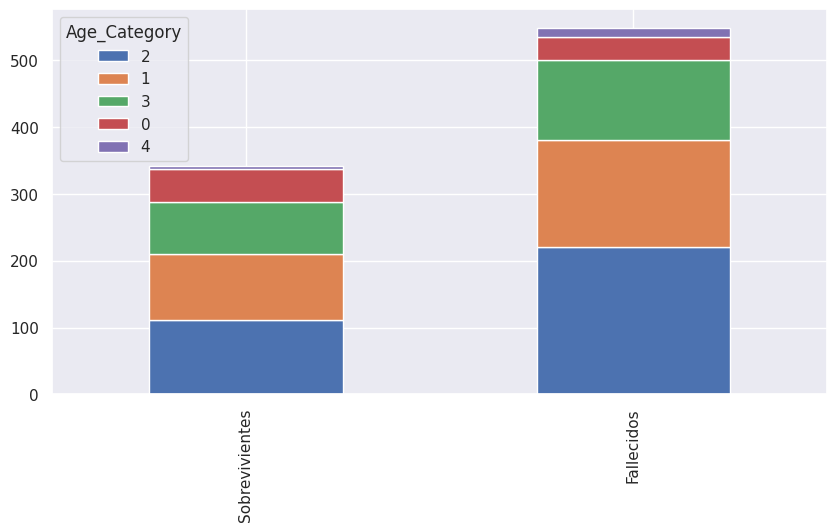

In [44]:
bar_chart("Age_Category")

## Actividad 1
De acuerdo a lo aprendido, llenar los espacios perdidos de embarcamiento y tarifa. Sacar conclusiones y comparta sus resultados.

## Desarrollo De La Actividad
*   Laura Daniela Rojas Ardila
*   Stiven Alexis Villamizar Buitrago

In [47]:
df.head() ## Se muestra la database

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Title,Age_Category
0,1,0,3,male,22.0,1,0,7.2500,S,Señor,1
1,2,1,1,female,38.0,1,0,71.2833,C,Señora,3
2,3,1,3,female,26.0,0,0,7.9250,S,Señorita,2
3,4,1,1,female,35.0,1,0,53.1000,S,Señora,2
4,5,0,3,male,35.0,0,0,8.0500,S,Señor,2


In [50]:
df.isnull()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Title,Age_Category
0,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...
886,False,False,False,False,False,False,False,False,False,False,False
887,False,False,False,False,False,False,False,False,False,False,False
888,False,False,False,False,False,False,False,False,False,False,False
889,False,False,False,False,False,False,False,False,False,False,False


In [49]:
## Se exporta la database para ver de forma manual si existen missing values alguna parte
df.to_csv("Titanic_data.csv", index=False)

Como se puede observar no existen missing values por lo que se procede a realizar el análisis estadístico de las variables Embarcamiento y tarifa

Análisis Desagrupado

Análisis Descriptivo de 'Fare':
count    891.000000
mean      32.204208
std       49.693429
min        0.000000
25%        7.910400
50%       14.454200
75%       31.000000
max      512.329200
Name: Fare, dtype: float64

Análisis Descriptivo de 'Embarked' (One-Hot Encoded):
       Embarked_Q Embarked_S
count         891        891
unique          2          2
top         False       True
freq          814        644


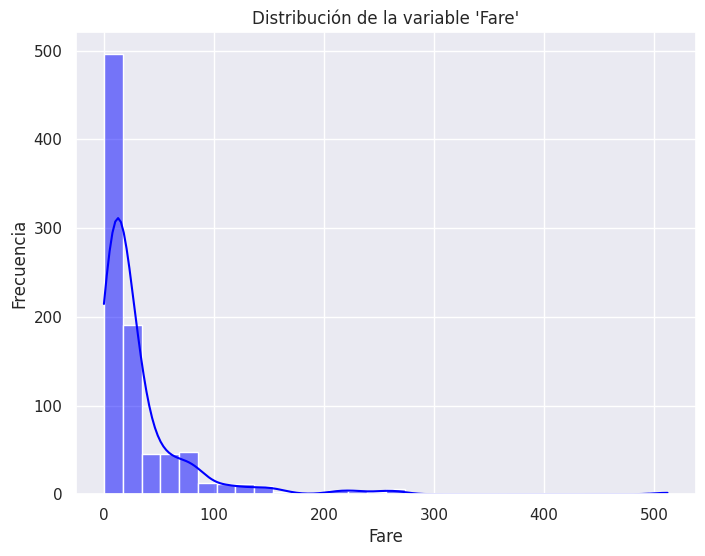

<ipython-input-51-d5655ea11bc9>:29: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Embarked', data=df, palette='Set2')


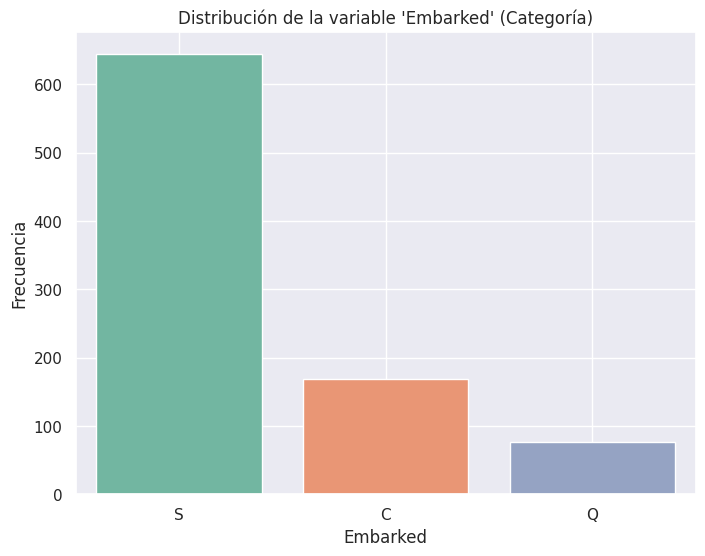

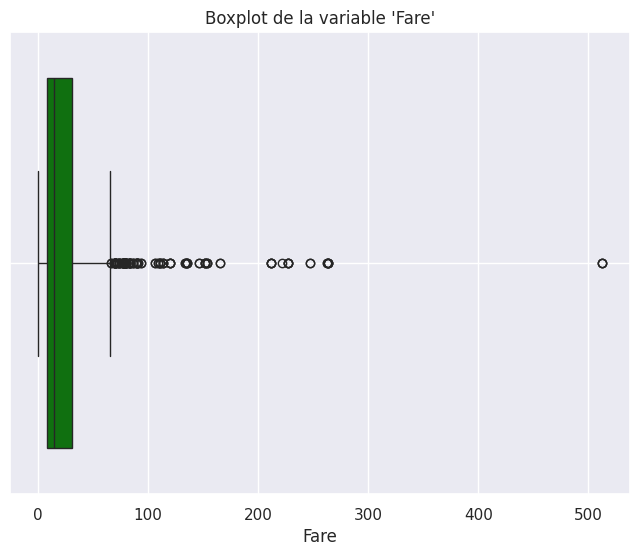

<ipython-input-51-d5655ea11bc9>:46: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Embarked', y='Fare', data=df, palette='Set1')


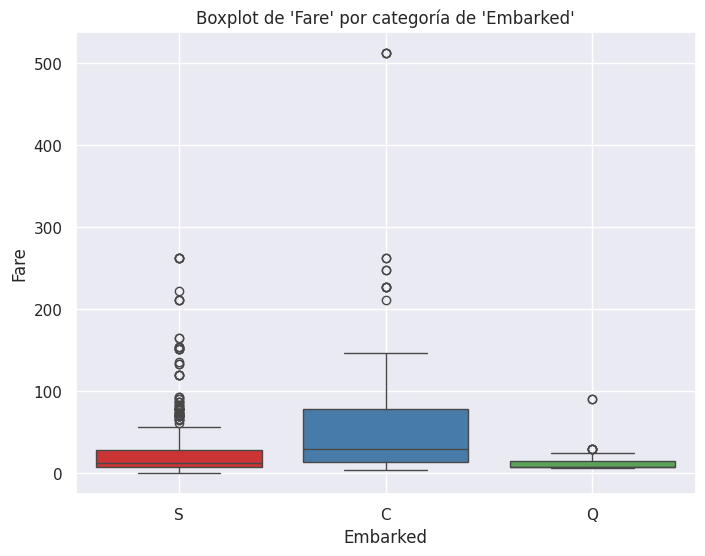

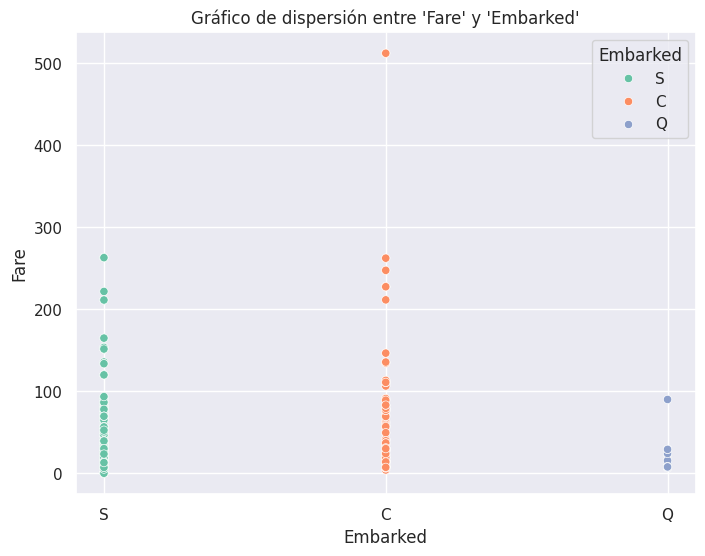

In [51]:
# Convertir 'Embarked' a variables dummy (One-Hot Encoding)
df_encoded = pd.get_dummies(df, columns=['Embarked'], drop_first=True)

# Análisis descriptivo de 'Embarked' y 'Fare'
# Descripción estadística para 'Fare'
fare_description = df['Fare'].describe()

# Descripción estadística de la variable 'Embarked' (Ahora ya está en variables dummy)
embarked_description = df_encoded[['Embarked_Q', 'Embarked_S']].describe()

# Mostrar las descripciones
print("Análisis Descriptivo de 'Fare':")
print(fare_description)
print("\nAnálisis Descriptivo de 'Embarked' (One-Hot Encoded):")
print(embarked_description)

# Gráficas estadísticas
# 1. Histograma de 'Fare'
plt.figure(figsize=(8, 6))
sns.histplot(df['Fare'], kde=True, bins=30, color='blue')
plt.title("Distribución de la variable 'Fare'")
plt.xlabel('Fare')
plt.ylabel('Frecuencia')
plt.grid(True)
plt.show()

# 2. Gráfico de barras para 'Embarked' (antes de One-Hot Encoding)
plt.figure(figsize=(8, 6))
sns.countplot(x='Embarked', data=df, palette='Set2')
plt.title("Distribución de la variable 'Embarked' (Categoría)")
plt.xlabel('Embarked')
plt.ylabel('Frecuencia')
plt.grid(True)
plt.show()

# 3. Boxplot de 'Fare' para analizar posibles outliers
plt.figure(figsize=(8, 6))
sns.boxplot(x=df['Fare'], color='green')
plt.title("Boxplot de la variable 'Fare'")
plt.xlabel('Fare')
plt.grid(True)
plt.show()

# 4. Boxplot de 'Fare' por las categorías de 'Embarked' (antes de One-Hot Encoding)
plt.figure(figsize=(8, 6))
sns.boxplot(x='Embarked', y='Fare', data=df, palette='Set1')
plt.title("Boxplot de 'Fare' por categoría de 'Embarked'")
plt.xlabel('Embarked')
plt.ylabel('Fare')
plt.grid(True)
plt.show()

# 5. Gráfico de dispersión (scatter plot) entre 'Fare' y 'Embarked' (antes de One-Hot Encoding)
plt.figure(figsize=(8, 6))
sns.scatterplot(x='Embarked', y='Fare', data=df, hue='Embarked', palette='Set2')
plt.title("Gráfico de dispersión entre 'Fare' y 'Embarked'")
plt.xlabel('Embarked')
plt.ylabel('Fare')
plt.grid(True)
plt.show()

1. Variable Fare (Tarifa)
  
    Análisis Descriptivo:

    Media: La tarifa promedio pagada por los pasajeros es bastante baja (aproximadamente 32.2).

    Mediana: La mediana es mucho menor que la media, lo que sugiere una distribución sesgada a la derecha (algunos pasajeros pagaron tarifas significativamente más altas).

    Desviación estándar: Hay una gran dispersión en las tarifas (desviación estándar alta), lo que indica que algunos pasajeros pagaron tarifas mucho más altas que la mayoría.

    Mínimo: El valor más bajo de la tarifa es 0, lo que puede indicar algunos casos especiales (como pasajeros que no pagaron por su boleto o errores en los datos).

    Máximo: La tarifa más alta es bastante elevada (512), lo que sugiere que algunos pasajeros pagaron una cantidad considerable.

    Gráficas:
    
    Histograma: La distribución de las tarifas tiene una forma sesgada hacia la derecha, con la mayoría de las tarifas en el rango bajo, pero con algunos valores muy altos.

    Boxplot: El boxplot confirma la presencia de outliers en los datos de tarifas, donde un pequeño número de pasajeros pagaron tarifas excepcionalmente altas.

    Distribución por categorías de Embarked: Los boxplots de Fare por categorías de Embarked muestran que los pasajeros que embarcaron en Southampton (S) tienden a tener una mayor dispersión en las tarifas pagadas, mientras que los de C y Q tienen tarifas más concentradas alrededor de valores más bajos. Esto podría indicar diferencias socioeconómicas o de clase entre los pasajeros que embarcaron en diferentes puertos.

    Conclusión para Fare:
    
    Los pasajeros tienen una amplia variedad de tarifas, con una gran cantidad de tarifas bajas y algunos valores atípicos elevados.

    Las tarifas más altas están principalmente asociadas con el puerto de embarque de Southampton (S), lo que podría reflejar diferencias de clase social o tipo de boleto.

2. Variable Embarked (Puerto de embarque)
    Análisis Descriptivo:

    La mayoría de los pasajeros embarcaron en Southampton (S), seguido de Cherburgo (C) y finalmente Queenstown (Q).

    La variable Embarked fue codificada en dos columnas dummy: Embarked_Q y Embarked_S. Esto nos da una idea clara de la distribución de los pasajeros entre los diferentes puertos de embarque.

    Gráficas:
    
    Gráfico de barras: El gráfico de barras muestra que la mayoría de los pasajeros embarcaron en S, con una menor proporción en C y una cantidad aún más baja en Q.

    Distribución de Fare por categorías de Embarked: Como mencionamos anteriormente, los pasajeros de S parecen tener una mayor variedad de tarifas, lo que sugiere que este puerto de embarque tiene una gama más amplia de clases sociales.

    Conclusión para Embarked:
    
    El puerto de embarque parece tener una relación con la clase social o tipo de boleto, con los pasajeros de Southampton (S) tendiendo a pagar tarifas más altas y con mayor dispersión. Cherburgo (C) y Queenstown (Q) tienen tarifas más concentradas en un rango más bajo.

    Conclusión General:

    Distribución de tarifas: La variable Fare tiene una distribución sesgada a la derecha, lo que indica que la mayoría de los pasajeros pagaron tarifas bajas, pero con algunos casos de tarifas significativamente altas, posiblemente asociadas con boletos de primera clase.

    Relación con el puerto de embarque: El puerto de embarque tiene una relación con las tarifas pagadas, con los pasajeros de Southampton mostrando mayor dispersión en las tarifas. Este análisis puede reflejar la influencia de la clase social o tipo de boleto, ya que los pasajeros de primera clase o los que pagaron boletos más caros probablemente embarcaron en este puerto.

    Outliers en las tarifas: Existen outliers en las tarifas, especialmente en el caso de algunos pasajeros que pagaron tarifas excepcionalmente altas, lo que podría ser relevante en modelos predictivos para entender patrones de pagos o clase social.

Análisis Agrupado Por Tipo De Cabina

Análisis Descriptivo de 'Fare' por 'Pclass':
        count       mean        std  min       25%      50%   75%       max
Pclass                                                                     
1       216.0  84.154687  78.380373  0.0  30.92395  60.2875  93.5  512.3292
2       184.0  20.662183  13.417399  0.0  13.00000  14.2500  26.0   73.5000
3       491.0  13.675550  11.778142  0.0   7.75000   8.0500  15.5   69.5500

Análisis Descriptivo de 'Fare' por 'Age Group':
               count       mean        std     min       25%       50%  \
Age_group                                                                
Niño            68.0  31.834803  26.504422  8.5167  19.14060  27.82500   
Joven           45.0  30.292969  40.296246  7.0542   8.02920  11.24170   
Adulto         526.0  25.106082  39.638013  0.0000   7.85420  10.31665   
Edad madura    178.0  47.917041  74.796569  0.0000  11.09375  26.00000   
Edad avanzada   74.0  46.364415  49.480722  6.2375  12.64375  27.63125   

       

<ipython-input-52-70fa1fd3ad16>:14: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  fare_by_age_group = df.groupby('Age_group')['Fare'].describe()
<ipython-input-52-70fa1fd3ad16>:18: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  survival_by_age_group = df.groupby('Age_group')['Survived'].mean()
<ipython-input-52-70fa1fd3ad16>:29: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='No_payment', data=df, palette='Set2')


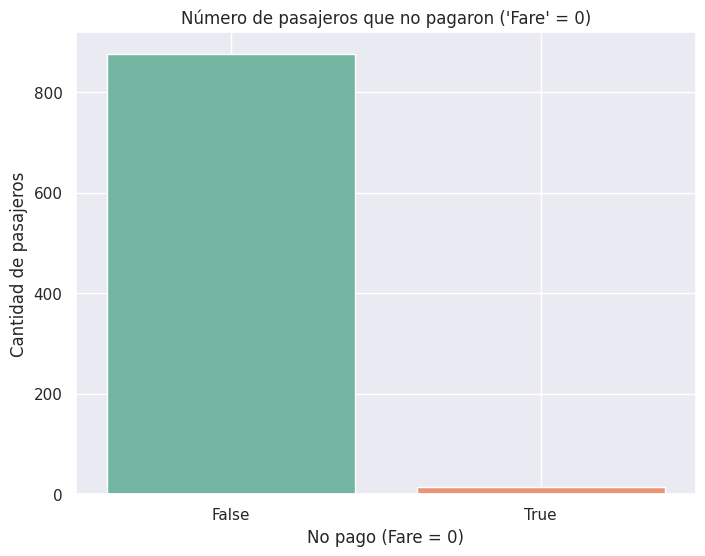

<ipython-input-52-70fa1fd3ad16>:38: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Pclass', y='Fare', data=df, palette='Set1')


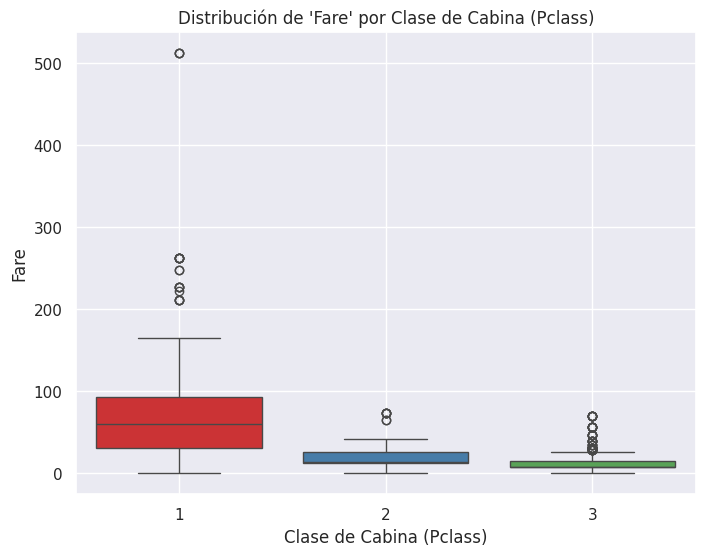

<ipython-input-52-70fa1fd3ad16>:47: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Age_group', y='Fare', data=df, palette='Set1')


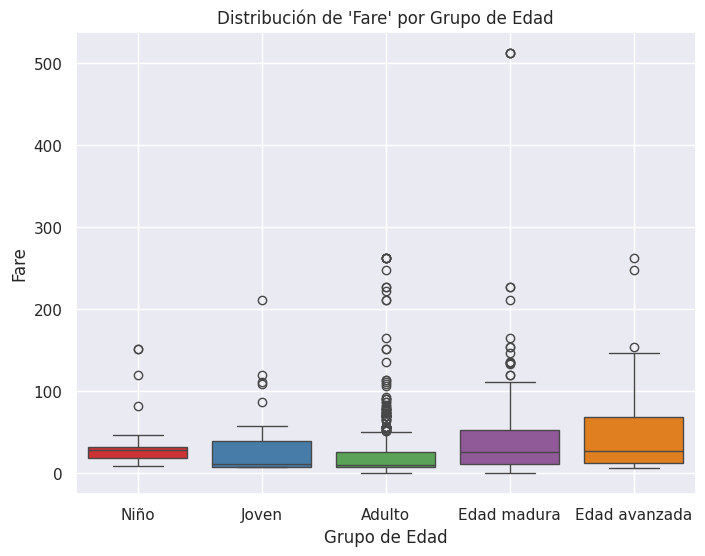

<ipython-input-52-70fa1fd3ad16>:56: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=survival_by_class.index, y=survival_by_class.values, palette='Set2')


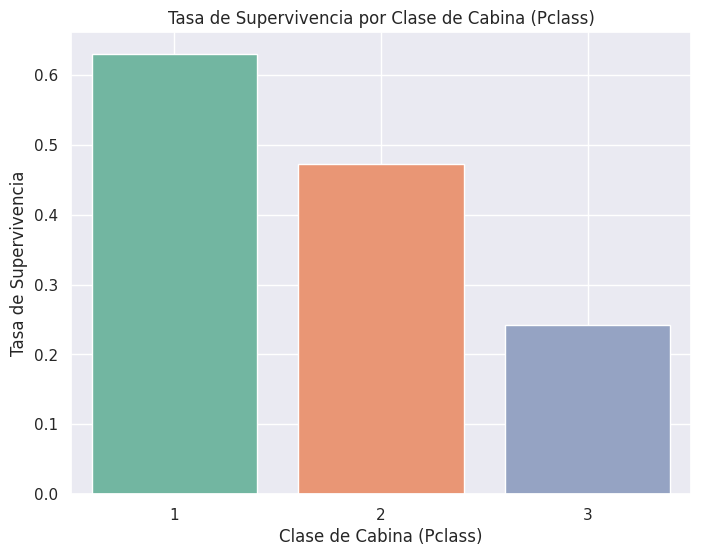

<ipython-input-52-70fa1fd3ad16>:65: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=survival_by_age_group.index, y=survival_by_age_group.values, palette='Set3')


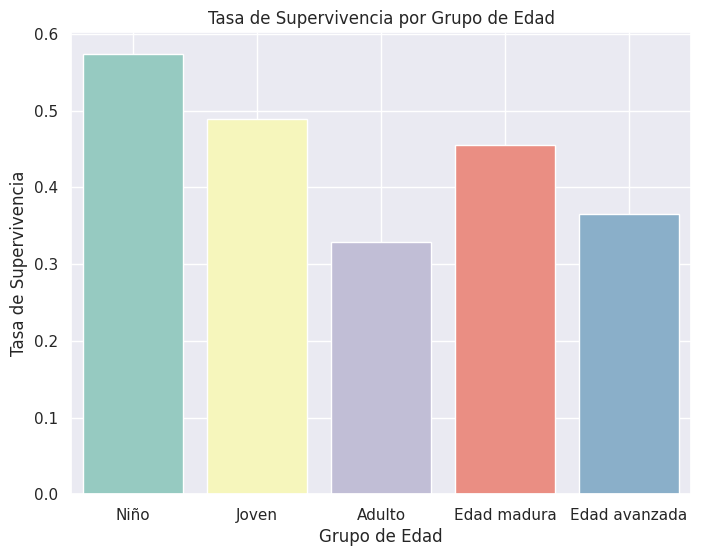

In [52]:
# Crear una nueva columna para la edad de los pasajeros según las categorías definidas
age_bins = [-np.inf, 12, 18, 35, 50, np.inf]  # Rangos de edad
age_labels = ['Niño', 'Joven', 'Adulto', 'Edad madura', 'Edad avanzada']
df['Age_group'] = pd.cut(df['Age'], bins=age_bins, labels=age_labels, right=False)

# Crear un grupo para aquellos que no pagaron nada (Fare = 0)
df['No_payment'] = df['Fare'] == 0

# Análisis descriptivo de tarifas por tipo de cabina (Pclass) y grupo de edad
# Para 'Fare' por 'Pclass'
fare_by_class = df.groupby('Pclass')['Fare'].describe()

# Para 'Fare' por grupo de edad
fare_by_age_group = df.groupby('Age_group')['Fare'].describe()

# Para supervivencia según clase y grupo de edad
survival_by_class = df.groupby('Pclass')['Survived'].mean()
survival_by_age_group = df.groupby('Age_group')['Survived'].mean()

# Imprimir los resultados descriptivos
print("Análisis Descriptivo de 'Fare' por 'Pclass':")
print(fare_by_class)
print("\nAnálisis Descriptivo de 'Fare' por 'Age Group':")
print(fare_by_age_group)

# Gráficas estadísticas
# 1. Histograma de 'Fare' para aquellos que no pagaron
plt.figure(figsize=(8, 6))
sns.countplot(x='No_payment', data=df, palette='Set2')
plt.title("Número de pasajeros que no pagaron ('Fare' = 0)")
plt.xlabel("No pago (Fare = 0)")
plt.ylabel("Cantidad de pasajeros")
plt.grid(True)
plt.show()

# 2. Boxplot de 'Fare' por clase de cabina (Pclass)
plt.figure(figsize=(8, 6))
sns.boxplot(x='Pclass', y='Fare', data=df, palette='Set1')
plt.title("Distribución de 'Fare' por Clase de Cabina (Pclass)")
plt.xlabel("Clase de Cabina (Pclass)")
plt.ylabel("Fare")
plt.grid(True)
plt.show()

# 3. Boxplot de 'Fare' por grupo de edad (Age Group)
plt.figure(figsize=(8, 6))
sns.boxplot(x='Age_group', y='Fare', data=df, palette='Set1')
plt.title("Distribución de 'Fare' por Grupo de Edad")
plt.xlabel("Grupo de Edad")
plt.ylabel("Fare")
plt.grid(True)
plt.show()

# 4. Gráfico de barras de la tasa de supervivencia por clase de cabina (Pclass)
plt.figure(figsize=(8, 6))
sns.barplot(x=survival_by_class.index, y=survival_by_class.values, palette='Set2')
plt.title("Tasa de Supervivencia por Clase de Cabina (Pclass)")
plt.xlabel("Clase de Cabina (Pclass)")
plt.ylabel("Tasa de Supervivencia")
plt.grid(True)
plt.show()

# 5. Gráfico de barras de la tasa de supervivencia por grupo de edad
plt.figure(figsize=(8, 6))
sns.barplot(x=survival_by_age_group.index, y=survival_by_age_group.values, palette='Set3')
plt.title("Tasa de Supervivencia por Grupo de Edad")
plt.xlabel("Grupo de Edad")
plt.ylabel("Tasa de Supervivencia")
plt.grid(True)
plt.show()

1. Número de pasajeros que no pagaron (Fare = 0):
    
    Observación: Al observar el histograma de pasajeros que no pagaron (con Fare = 0), podemos ver cuántos registros corresponden a este grupo. Este grupo podría estar compuesto por pasajeros que recibieron boletos gratuitos (familiares de otros pasajeros, especialmente niños), pasajeros con tarifas especiales o registros incompletos.

    Conclusión: Si el número de pasajeros que no pagaron es significativo, podría ser útil revisar cómo se manejan los datos faltantes en el dataset. Además, esto puede influir en el análisis de tarifas y supervivencia, ya que estos pasajeros podrían tener características diferentes a aquellos que pagaron por su boleto.

2. Distribución de tarifas por clase de cabina (Pclass):
    Observación: Los boxplots muestran que los pasajeros de Primera clase (Pclass = 1) tienen tarifas significativamente más altas, mientras que los de Tercera clase (Pclass = 3) tienen tarifas más bajas. Las segundas clases están entre ambos extremos, con una variabilidad menor.

    Conclusión: Esta distribución es esperada, ya que en la realidad, los boletos de Primera clase eran considerablemente más caros que los de Tercera clase. Esto también sugiere que los pasajeros de Primera clase podrían haber tenido más recursos para pagar por mejores condiciones de viaje.

3. Distribución de tarifas por grupo de edad:
    Observación: En los boxplots de tarifas por grupo de edad, se observa que los Niños (0-12) y Jóvenes (13-18) tienen tarifas mucho más bajas en comparación con los Adultos, Edad madura y Edad avanzada. Esto refleja las tarifas más bajas para menores de edad en el Titanic.

    Conclusión: Los niños y jóvenes tienen tarifas menores, lo cual es común en los boletos para menores. Además, las tarifas para los adultos y personas mayores son más homogéneas, lo que indica una tarifa más estandarizada en esas edades.

4. Tasa de supervivencia por clase de cabina (Pclass):
    Observación: Los pasajeros de Primera clase tienen una tasa de supervivencia más alta en comparación con los de Segunda y Tercera clase. Esto es consistente con los registros históricos del Titanic, donde aquellos en Primera clase tuvieron prioridad para abordar los botes salvavidas.

    Conclusión: Los pasajeros en Primera clase probablemente tuvieron mayores oportunidades de supervivencia debido a su proximidad a los botes salvavidas y la prioridad dada a las clases más altas. Por otro lado, los pasajeros en Tercera clase tuvieron menos oportunidades, lo que se refleja en su tasa de supervivencia más baja.

5. Tasa de supervivencia por grupo de edad:
    Observación: Los Niños (0-12) tienen una tasa de supervivencia extremadamente alta, lo que refleja la prioridad que se dio a los niños durante el hundimiento del Titanic. Los Jóvenes (13-18) y Adultos también muestran tasas de supervivencia razonablemente altas, pero los Adultos mayores y Personas de edad avanzada tienen tasas más bajas.

    Conclusión: Es consistente con la historia del Titanic que los niños y jóvenes fueron evacuados primero. Los adultos mayores, debido a su vulnerabilidad y a las dificultades para subir a los botes salvavidas, tuvieron una tasa de supervivencia más baja.

    Resumen de las principales conclusiones:
    Disparidad en tarifas según clase: La diferencia de tarifas entre las clases es notable, con los pasajeros de Primera clase pagando mucho más que los de Tercera clase.

    Importancia de la edad: Los grupos de Niños y Jóvenes tienen tarifas más bajas, y su tasa de supervivencia es mucho más alta debido a la prioridad en el rescate. Los Adultos y Personas mayores mostraron tasas de supervivencia más bajas.

    Supervivencia por clase: La clase de cabina es un factor determinante en la tasa de supervivencia, con los pasajeros de Primera clase teniendo una ventaja clara sobre los de Tercera clase.

    Tarifas y supervivencia no siempre correlacionadas: Aunque las tarifas pueden indicar las condiciones en las que los pasajeros viajaron, la tasa de supervivencia parece estar más relacionada con la clase social y la edad, no solo con el costo del boleto.